In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
automobile_data = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
232,24.5,4,151.0,88,2740,16.0,-189951
374,36.0,4,120.0,88,2160,14.5,-189956
4,17.0,8,302.0,140,3449,10.5,-189944
273,17.0,6,163.0,125,3140,13.6,-189952
218,33.5,4,85.0,70,1945,16.8,-189951


In [5]:
automobile_data.shape

(392, 7)

Text(0.5, 1.0, 'Miles per gallon')

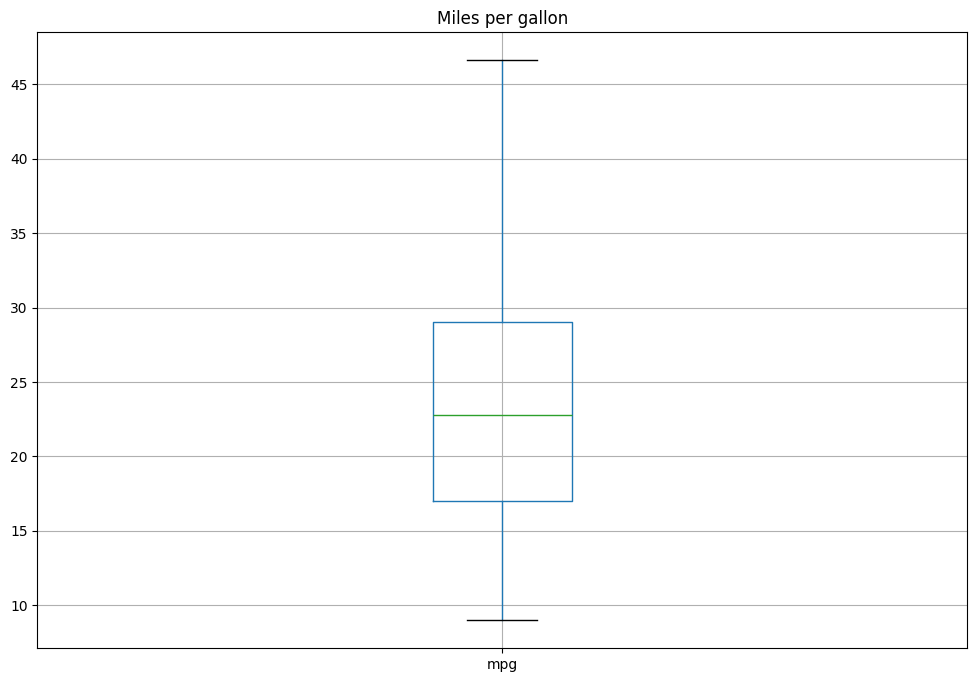

In [6]:
automobile_data.boxplot('mpg', figsize=(12, 8))

plt.title('Miles per gallon')

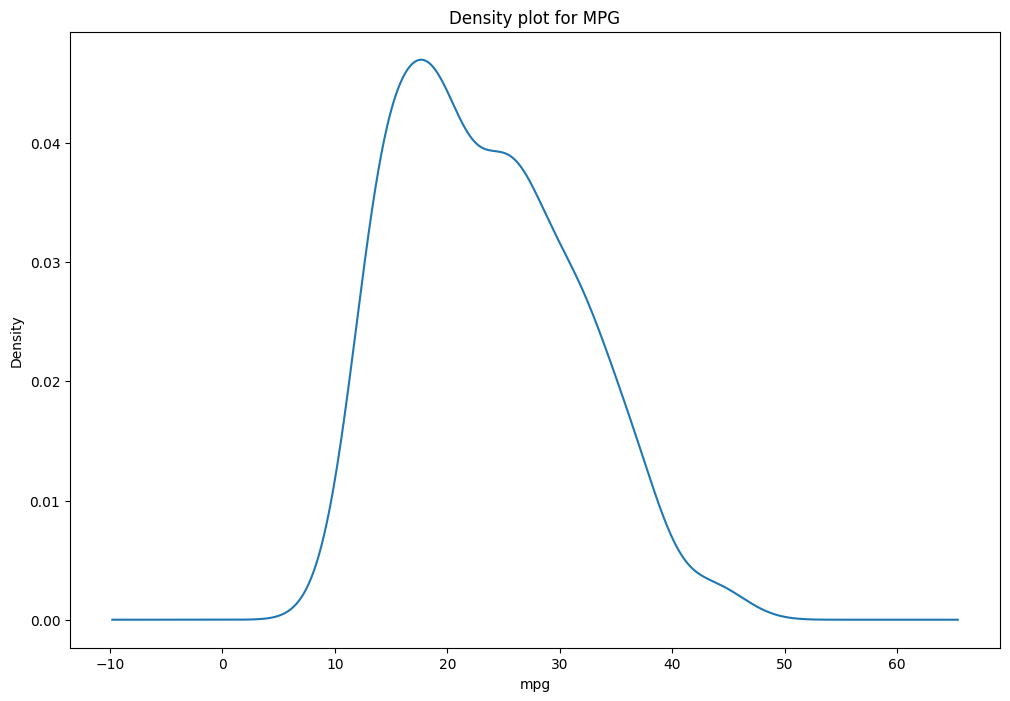

In [7]:
automobile_data['mpg'].plot.kde(figsize=(12, 8))

plt.xlabel('mpg')

plt.title('Density plot for MPG')
plt.show()

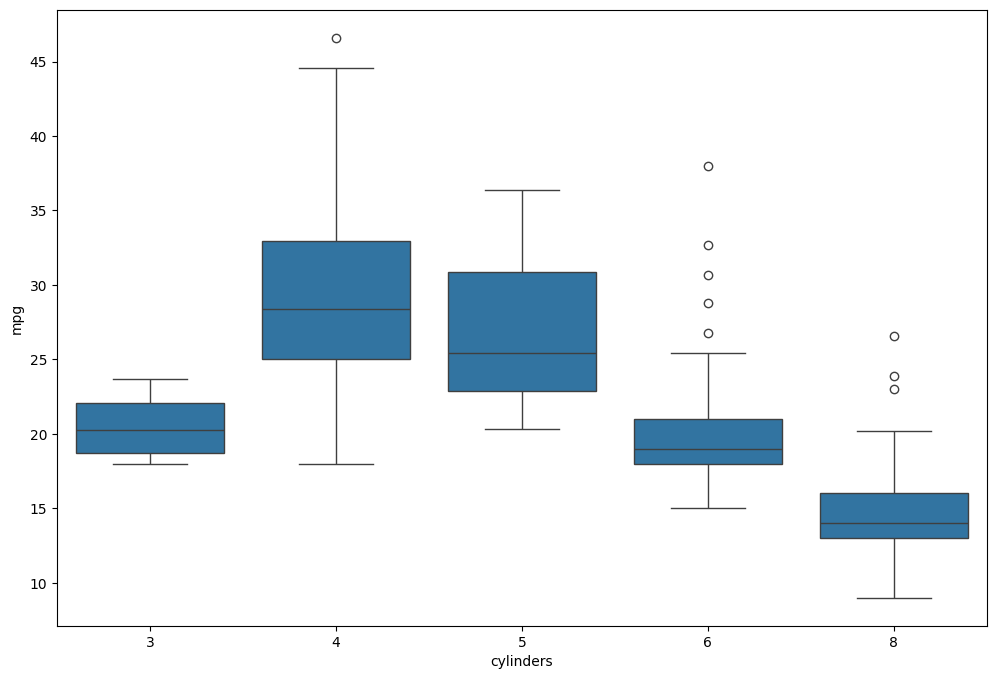

In [8]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='cylinders', y='mpg', data=automobile_data)

plt.show()

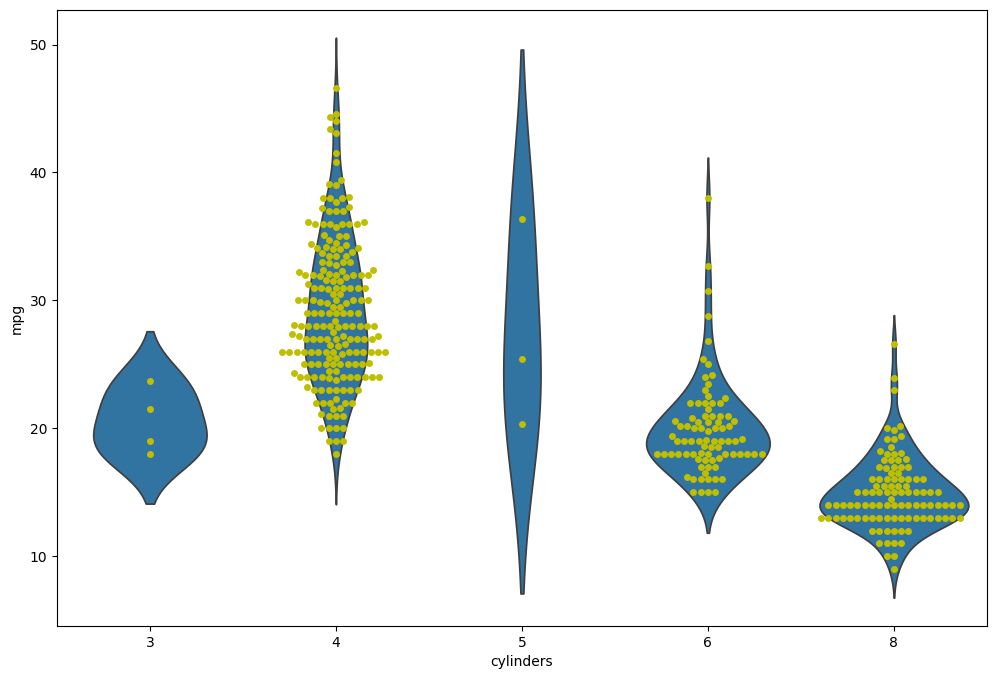

In [9]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='cylinders', y='mpg', data=automobile_data, inner=None)
sns.swarmplot(x='cylinders', y='mpg', data=automobile_data, color='y')

plt.show()

In [10]:
cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])

cylinder_stats

,mean,count,std
cylinders,,,
3,20.550000,4,2.564501
4,29.283920,199,5.670546
5,27.366667,3,8.228204
6,19.973494,83,3.828809
8,14.963107,103,2.836284


In [11]:
ci95_high = []

ci95_low = []

In [12]:
for i in cylinder_stats.index:
    
    mean, count, std = cylinder_stats.loc[i]
    
    ci95_high.append(mean + 1.96 * (std / math.sqrt(count)))
    ci95_low.append(mean - 1.96 * (std / math.sqrt(count)))

In [13]:
cylinder_stats['ci95_HIGH'] = ci95_high
cylinder_stats['ci95_LOW'] = ci95_low

cylinder_stats

,mean,count,std,ci95_HIGH,ci95_LOW
cylinders,,,,,
3,20.550000,4,2.564501,23.063211,18.036789
4,29.283920,199,5.670546,30.071789,28.496050
5,27.366667,3,8.228204,36.677755,18.055578
6,19.973494,83,3.828809,20.797216,19.149772
8,14.963107,103,2.836284,15.510863,14.415351


In [14]:
cylinders = 4

cylinders4_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders4_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
79,22.0,4,122.0,86,2395,16.0,-189946
353,31.6,4,120.0,74,2635,18.3,-189955
83,27.0,4,97.0,88,2100,16.5,-189946
77,21.0,4,120.0,87,2979,19.5,-189946
342,32.3,4,97.0,67,2065,17.8,-189955
365,31.0,4,112.0,85,2575,16.2,-189956
116,29.0,4,68.0,49,1867,19.5,-189947
343,37.0,4,85.0,65,1975,19.4,-189955
217,25.5,4,122.0,96,2300,15.5,-189951
389,32.0,4,135.0,84,2295,11.6,-189956


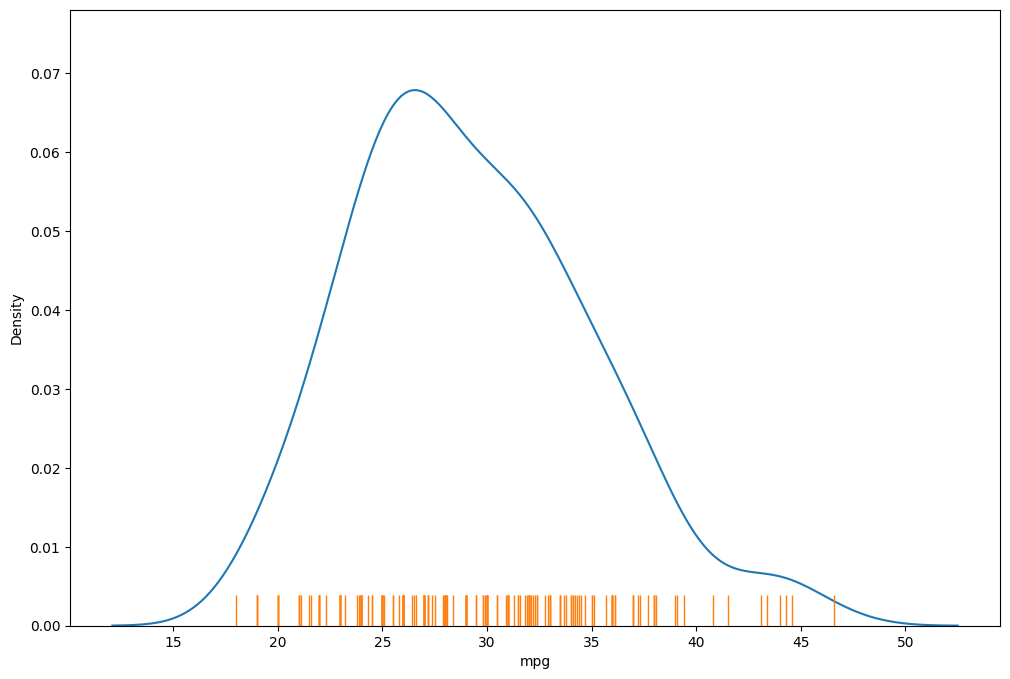

In [18]:
plt.figure(figsize=(12, 8))

sns.kdeplot(data=cylinders4_df, x='mpg', fill=False)
sns.rugplot(data=cylinders4_df, x='mpg', height=0.05)

plt.show()

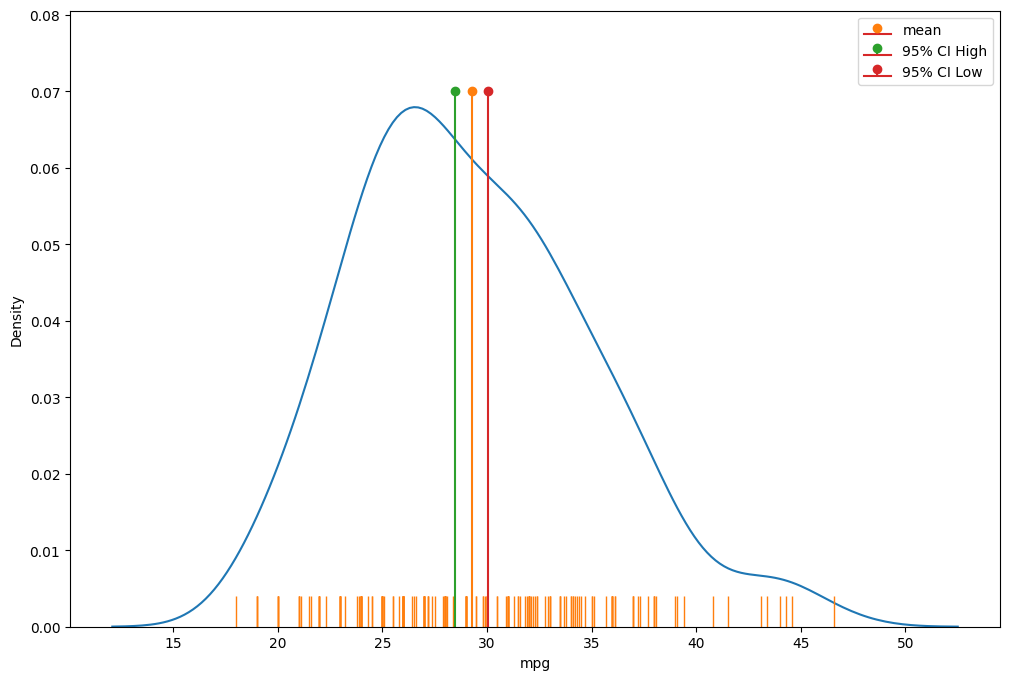

In [19]:
plt.figure(figsize=(12, 8))

# sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)
sns.kdeplot(data=cylinders4_df, x='mpg', fill=False)
sns.rugplot(data=cylinders4_df, x='mpg', height=0.05)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.07], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.07], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.07], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()

In [20]:
cylinders = 6

cylinders6_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders6_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
125,19.0,6,232.0,100,2901,16.0,-189948
357,24.2,6,146.0,120,2930,13.8,-189955
282,20.6,6,225.0,110,3360,16.6,-189953
209,16.5,6,168.0,120,3820,16.7,-189950
17,21.0,6,200.0,85,2587,16.0,-189944
158,17.0,6,231.0,110,3907,21.0,-189949
32,19.0,6,232.0,100,2634,13.0,-189945
112,21.0,6,155.0,107,2472,14.0,-189947
24,21.0,6,199.0,90,2648,15.0,-189944
223,17.5,6,250.0,110,3520,16.4,-189951


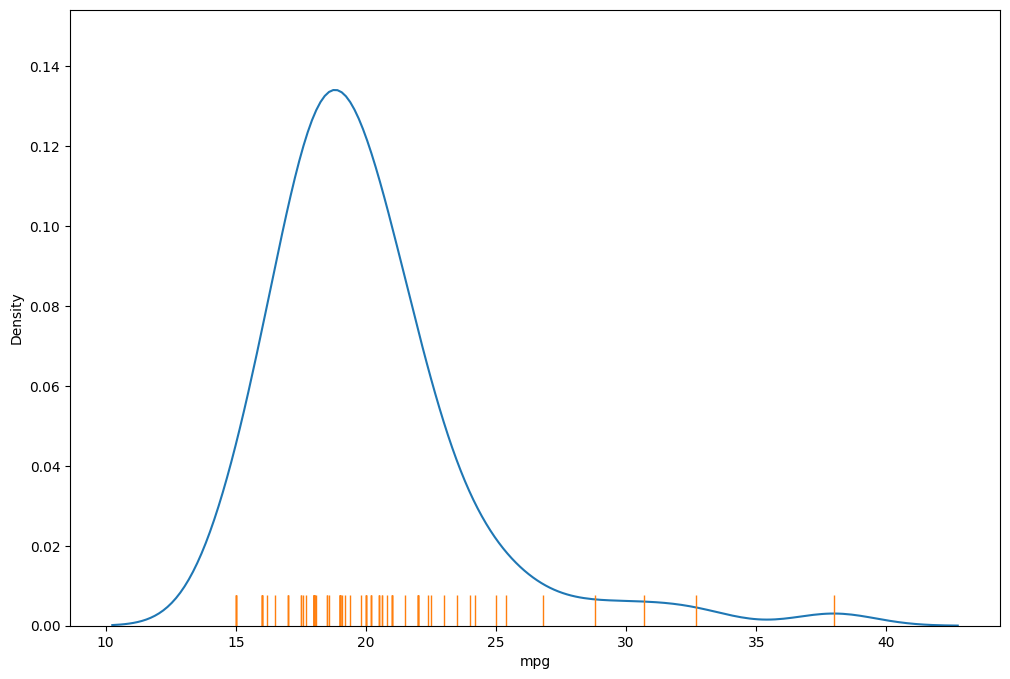

In [21]:
plt.figure(figsize=(12, 8))

# sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)
sns.kdeplot(data=cylinders6_df, x='mpg', fill=False)
sns.rugplot(data=cylinders6_df, x='mpg', height=0.05)

plt.show()

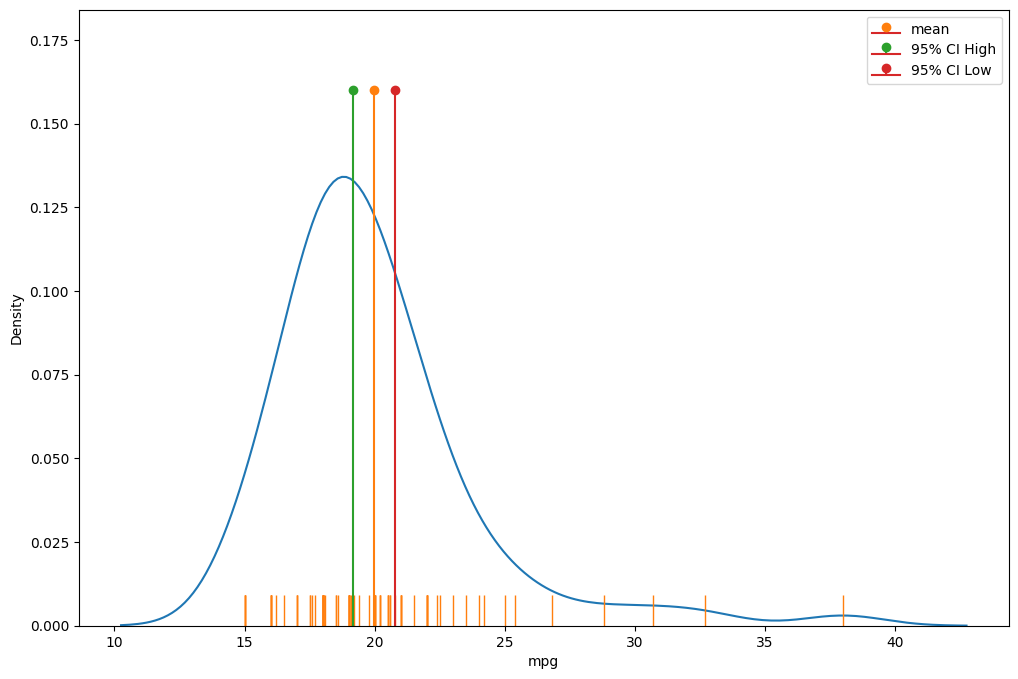

In [23]:
plt.figure(figsize=(12, 8))

# sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)
sns.kdeplot(data=cylinders6_df, x='mpg', fill=False)
sns.rugplot(data=cylinders6_df, x='mpg', height=0.05)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.16], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.16], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.16], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()